# MTH9879 Homework 2

Assigned: February 8, 2018.
Due: February 22, 2018 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


## Junliang Zhou

Tel: (347) 276-1207

Email: gjimzhou@gmail.com

### 0. (0 points) 

Read Chapter 12 of Hasbrouck and Section 6.4 of Foucault, Pagano and R&ouml;ell.


## The Parlour (1998) model

### 1. (10 points) 
Consider the first step $t = 1$ of the 3-step order book case presented in the lecture slides. Suppose that the order book at (or just before) $t = 1$ has one share offered and one share bid ($n_B = n_A = 1$).

Give the probabilities as of a market buy, market sell, limit buy and limit sell at $t = 1$,
You may use my Mathematica notebook *Parlour.nb* as a guide (if you wish).

### Solution:

There are six possible actions at $t = 1$, and each will generate a different order book. All six possible actions are summarized in the table shown below.

|  Action  |  Order book  |
|:---------|:---------|
|  Market sell (MS)  |  $(0, 1)$  |
|  Limit sell (LS)  |  $(1, 2)$  |
|  No sell (NS)  |  $(1, 1)$  |
|  Market buy (MB)  |  $(1, 0)$  |
|  Limit buy (LB)  |  $(2, 1)$  |
| No buy (NB)  |  $(1, 1)$  |

For limit sell and limit buy, succeed actions should be taken into consideration. As there are already two limit sells/buys in the order book, two conclusions can be drawn:
1. Succeed traders cannot submit limit orders.
2. Limit sell/buy can be fulfilled only if all two succeed traders submit market sell/buy.

Thus, the second and the third trader will have the same strategy. According to Lecture 3, that is 
$$
\PP^S_2 = \PP^S_3 = \frac {5} {22}.
$$ 

By symmetry, 
$$
\PP^B_2 = \PP^B_3 = \frac {5} {22}.
$$

As a result, payoff of each six actions can be calculated and summarized in the table shown below.

|  Action  |  Payoff  |
|:---------|:----------------|
|  Market sell (MS)  |  $B - \beta_1 V$  |
|  Limit sell (LS)  |  $(A-\beta_1 V)\PP^S_2\PP^S_3$  |
|  No sell (NS)  |  $0$  |
|  Market buy (MB)  |  $\beta_1 V - A$  |
|  Limit buy (LB)  |  $(\beta_1 V-B)\PP^B_2\PP^B_3$  |
| No buy (NB)  |  $0$  |

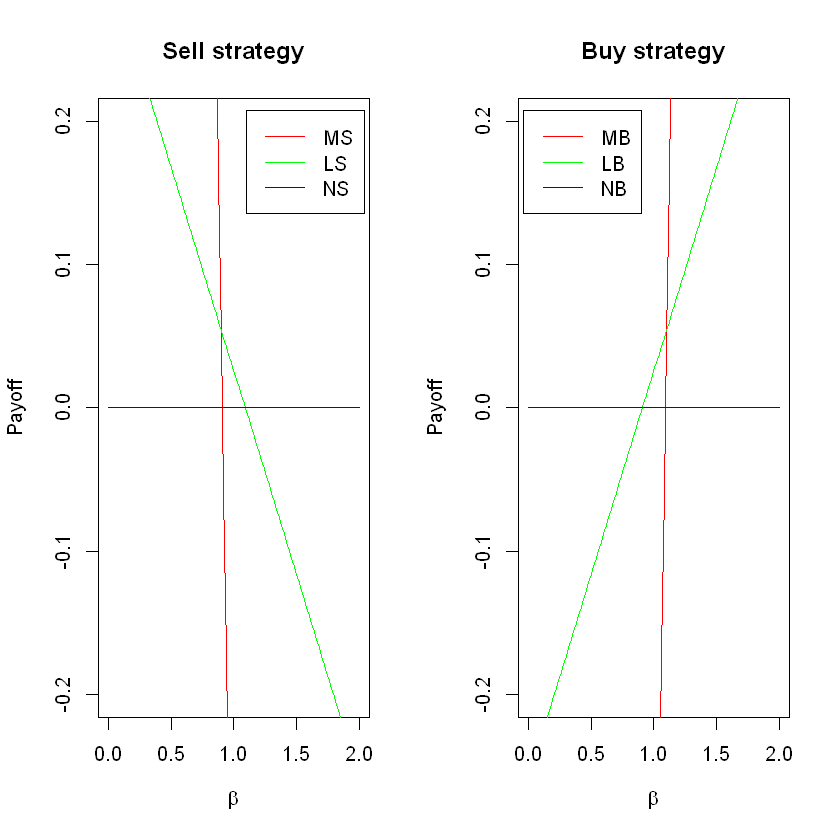

In [35]:
# Set plots position
par(mfrow=c(1,2))

# Initialize parameters
v <- 5.5
b <- 5
a <- 6
ps <- 5/22
pb <- 5/22

# Plot sell strategy
plot (0:2, (-1:1)/5, type="n", main="Sell strategy", xlab=expression(beta), ylab="Payoff")
curve(b-v*x, add=T, col="red")
curve((a-v*x)*ps*ps, add=T, col="green")
curve(0*x, add=T, col="blue")
legend("topright", c("MS", "LS", "NS"), col=c("red", "green", "blue"), lty=1, inset=0.02)

# Plot buy Strategy
plot (0:2, (-1:1)/5, type="n", main="Buy strategy", xlab=expression(beta), ylab="Payoff")
curve(v*x-a, add=T, col="red")
curve((v*x-b)*pb*pb, add=T, col="green")
curve(0*x, add=T, col="blue")
legend("topleft", c("MB", "LB", "NB"), col=c("red", "green", "blue"), lty=1, inset=0.02)

From the plots above we can calculate two crossover points, $\beta_1 = \frac {4540} {5049}$, $\beta_1 = \frac {12} {11}$ for sell orders, and $\beta_1 = \frac {5558} {5049}$, $\beta_1 = \frac {10} {11}$ for buy orders.

Thus, the probability of each six actions can be calculated and summarized in the table shown below.

|  Action  |  Condition  |  Probability  |
|:---------|:------------|:--------------|
|  Market sell (MS)  |  $0 \leq \beta_1 < \frac {4540} {5049}$  |  $\frac {1135} {5049}$  |
|  Limit sell (LS)  |  $\frac {4540} {5049} \leq \beta_1 < \frac {12} {11}$  |  $\frac {22} {459}$  |
|  No sell (NS)  |  $\frac {12} {11} \leq \beta_1 \leq 2$  |  $\frac {5} {22}$  |
|  Market buy (MB)  |  $\frac {4540} {5049} < \beta_1 \leq 2$  |  $\frac {1135} {5049}$  |
|  Limit buy (LB)  |  $\frac {10} {11} < \beta_1 \leq \frac {4540} {5049}$  |  $\frac {22} {459}$  |
| No buy (NB)  |  $0 \leq \beta_1 \leq \frac {10} {11}$  |  $\frac {5} {22}$  |

### 2. (4 points) 
Explain why the optimal market/limit order decision depends in general on quantity available on both sides of the order book in the Parlour model.

### Solution:

Firstly, if quantity on the same side increases, the likelihood of submitting a limit order will decrease, since it will be harder to fulfill. Correspondingly, the likelihood of submitting a market order will increase.

Now that a limit order requires a market order from the opposite side to fulfill it, quantity on the opposite side will also change the likelihood of submitting a limit order by changing the likelihood of submitting a market order on the opposite side. Thus, if quantity on the opposite side increases, the likelihood of submitting a market order on the opposite side will increase, and push up the likelihood of submitting a limit order.

### Set up R-environment

In [1]:
#download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
#unzip(zipfile="ziSetup.zip")
source("ziSetup.R")

library(repr)
options(repr.plot.width=7,repr.plot.height=7)

## Cont-Kukanov optimal order placement

### 3. (16 points)

Consider the two BATS exchanges BZX and BYX.  Suppose you are trying to buy shares of MSFT in 3.9 minutes ($1\%$ of the trading day).  Suppose further that the two exchanges have the following characteristics:

**Exchange** | **Make fee** | **Take fee** | **Daily volume** 
-----|-----:|-------:| ---- |
| **(per share)** | **(per share)** | **(shares)** 
BZX | -0.32¢ | +0.30¢ | 10,500,000
BYX | +0.03¢ | -0.03¢ | 1,300,000

Assume the daily volatility of MSFT is $1\%$ and that MSFT is trading at $\$37.50$.

(a) We may suppose that if your order is only partially filled, that's because the price moved away (*adverse selection*).  This suggests that we penalize any under fill of limit orders by $\sigma\,\sqrt{T}$ where $T$ is the order duration.  Compute the corresponding value of $\lambda_u$ in cents per share.


(b) Assuming a spread of $1$ cent, what are $h$, $f$, and $r$ for BZX and BYX respectively (in cents per share)?


(c) Assuming no seasonality, what is the mean value $\bar \xi$ of $\xi$ (over 3.9 minutes) for BZX and BYX respectively (in shares)?


(d)  Assume that $\xi$ is log normally distributed with

$$
\xi = \bar \xi \,\exp\left\{\sigma\,Z-\frac 12\,\sigma^2\right\}.
$$

where $Z \sim N(0,1)$ and $\sigma = 1/2$.  What is the standard deviation of $\xi$ (in terms of $\bar \xi$)?


(e) Write R-code to determine the optimal order size $L^\star+Q$ on BZX and BYX respectively. Assume here that you will either trade on BZX or BYX; there is no splitting of the order between the two exchanges. <br>
(Hint: You may find the R function *qnorm(. )* useful).


(f) Compare the optimal limit order sizes from part (e) with the ratios of quote sizes and volumes on BZX and BYX.  Are your results from part (e) roughly consistent with observation.  You may assume that the quote sizes shown on the MSFT BATS slides from Lecture 1 are typical.

### Solution:

(a)

$\lambda_u=\sigma\sqrt{T}=1\%\times 37.50 \times \sqrt{1\%}=0.0375$

(b)

Exchange | $h$ | $f$ | $r$ 
-----|:-----:|:-------:|:----:|
BZX | 0.0050 | 0.0030 | 0.0032
BYX | 0.0050 | -0.0003 | -0.0003

(c)

Exchange | $\bar\xi$ 
-----|:-----:|
BZX | 105,000 
BYX | 13,000 

(d)

$\Var[\xi]={\bar\xi}^2 {(e^{\sigma^2}-1)}={\bar\xi}^2 {(e^{\frac14}-1)}$

$\sigma_\xi=\bar\xi \sqrt{(e^{\frac14}-1)}$

(e)

In [2]:
# Solution for optimal order size
optOrderSize <- function(EX) {
    h <- EX[1]
    f <- EX[2]
    r <- EX[3]
    xi <- EX[4]
    sigma <- EX[5]
    lambda <- EX[6]
    z <- (2*h+f+r)/(lambda+h+r)
    floor(qlnorm(z, meanlog=-1/2*sigma*sigma+log(xi), sdlog=sigma))
}

# Parameters
BZX <- c(0.0050, 0.0030, 0.0032, 105000, 0.5, 0.0375)
BYX <- c(0.0050, -0.0003, -0.0003, 13000, 0.5, 0.0375)

# Calculate results
optOrderSize(BZX)
optOrderSize(BYX)

[1] 76887

[1] 7834

The optimal order size $L^\star+Q$ on BZX and BYX is 76887 and 7834 respectively.

(f)

In [36]:
aveSizeBZX <- mean(c(753, 400, 400, 300, 200, 300, 300, 200, 500, 453))
aveSizeBYX <- mean(c(100, 200, 300, 400, 300, 200, 100, 100, 353, 100))
volumeBZX <- 219014
volumeBYX <- 71377
ratioBZX <- aveSizeBZX / volumeBZX
ratioBYX <- aveSizeBYX / volumeBYX
ratioBZX
ratioBYX

[1] 0.001737788

[1] 0.003016378

Conclusions cannot be drawn.

## The Bouchaud-M&eacute;zard-Potters order book approximation

### 4. (16 points)

When $\lambda(u)=\alpha$,  a constant, the BMP order density becomes

\begin{eqnarray*}
\rho_{BMP}(\Delta) &=& \frac{\alpha}{\delta}\,\left\{e^{-\Delta/{\tilde \Delta}}\,\int_0^{\Delta/{\tilde\Delta}}\,\sinh(u)\,du + \sinh(\Delta/{\tilde \Delta})\,\int_{\Delta/{\tilde\Delta}}^\infty\,e^{-u}\,du\right\} \\
&=&\frac{\alpha}{\delta}\,\left\{1 - e^{-\Delta/{\tilde \Delta}}  \right\}
\end{eqnarray*}

where the characteristic distance

$$
\tilde \Delta=\sqrt{\frac{\sigma^2}{2\,\delta}}.
$$

(a) Amend the SFGK zero intelligence code from Problem 3 of HW1 to count the number of limit orders generated in addition to computing the average book shape.

(b) With $\alpha = 1$, $\mu = 10$ and $\delta = \frac15$, simulate 100,000 events and plot the resulting average book shape in red (in a band $\pm 20$ around the mid price).

(c) From your simulation, what is the probability $P_L$ of a limit order at a given level conditional on an event? (Recall that there are 60 limit order levels in the simulation).

(d) In [Gatheral and Oomen]<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>1<span>]</span></a></sup>, with these SFGK parameters, realized variance per event was estimated as

$$
\sigma^2_{GO} = 0.083.
$$

Using your estimate $P_L$ of limit orders per level per event, convert this estimate to variance per limit order (recall that $\alpha=1$).  Denote your result by $\sigma^2_{GO}$.  Compute the characteristic distance $\tilde \Delta_{GO}$ with this estimate $\sigma^2_{GO}$.

(e) In Lecture 1, using dimensional analysis, we estimated that variance $\sigma^2_{DA}$ per unit time should be of the order of

$$
\sigma^2_{DA} = \frac{\mu^2\,\delta}{\alpha^2}.
$$

Compute the characteristic distance $\tilde \Delta_{DA}$ with this estimate $\sigma^2_{DA}$.

(f)  Using your two estimates of $\tilde \Delta$ from parts (d) and (e),  write functions to compute the corresponding order book densities $\rho_{GO}(\Delta)$ and $\rho_{DA}(\Delta)$.

(g)
Superimpose plots of the asymptotic densities $\rho_{DA}(\Delta)$ (in blue) and $\rho_{DA}(\Delta)$ (in orange) on your plot of the average book shape.

### Solution

(a)

In [2]:
# Initialize
numLimitBuy <<- 0
numLimitSell <<- 0

# Modify limit buy
limitBuyOrder <- function(price=NA) {
    if(is.na(price))
    {prx <<- (bestOffer()-pick(L))}
    else prx <<- price  
    if(logging==T){eventLog[count,]<<- c("LB",prx)} 
    numLimitBuy <<- numLimitBuy+1
    book$buySize[book$Price==prx] <<- book$buySize[book$Price==prx]+1
} 

# Modify limit sell
limitSellOrder <- function(price=NA){
    if(is.na(price))
    {prx <<- (bestBid()+pick(L))}
    else prx <<- price  
    if(logging==T){eventLog[count,] <<- c("LS",prx)}
    numLimitSell <<- numLimitSell+1
    book$sellSize[book$Price==prx]<<-book$sellSize[book$Price==prx]+1
} 

# Reset
resetLimitCount <- function() {
    numLimitBuy <<- 0
    numLimitSell <<- 0
}

(b)

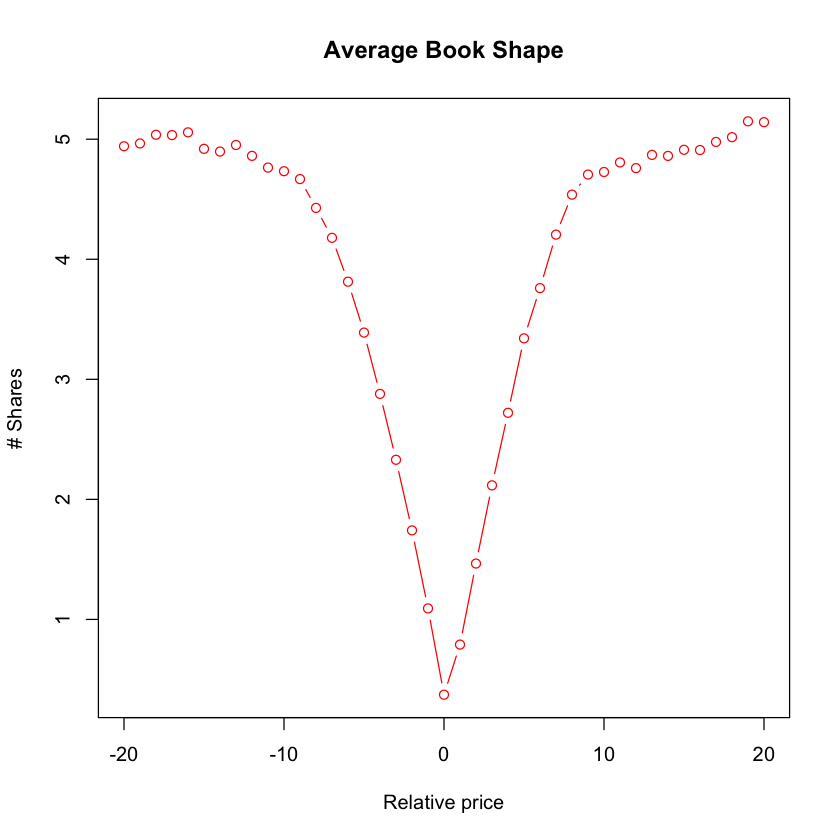

In [3]:
# Mystery tag again
logging <- F

# Initialize order book
alpha <- 1
mu <- 10
delta <- 1/5
resetLimitCount() ###
initializeBook5()

# Burn in for 100 events
for(count in 1:100){
    generateEvent()
}

# Set event times
numEvents <- 100000

# Calculate average book shape
avgBookShape <- bookShape(20) / numEvents
for(count in 2:numEvents){
    generateEvent()
    avgBookShape <- avgBookShape + bookShape(20) / numEvents
}
    
# Plot the result
plot(-20:20, avgBookShape, main="Average Book Shape", xlab="Relative price", ylab="# Shares", col="red", type="b")

(c)

In [4]:
PL <- (numLimitBuy + numLimitSell) / numEvents / (2*L)
PL

[1] 0.008340167

The probability $P_L$ of a limit order at a given level conditional on an event is 0.00834066666666667.

(d)

In [5]:
sig2GO <- 0.083
sig2GO <- sig2GO / (2*PL)
sig2GO
DeltaGO <- sqrt(sig2GO / (2*delta))
DeltaGO

[1] 4.97592

[1] 3.52701

The characteristic distance $\tilde \Delta_{GO}$ is 3.52690425625691.

<font color=red>COMMENT: expected to be a little higher. -1pt</font>

(e)

In [6]:
sig2DA <- mu^2*delta/alpha^2
sig2DA
DeltaDA <- sqrt(sig2DA / (2*delta))
DeltaDA

[1] 20

[1] 7.071068

The characteristic distance $\tilde \Delta_{DA}$ is 7.07106781186548.

(f)

In [7]:
# Function to calculate rho
rho <- function(alpha, delta, Delta, d) {
    (alpha / delta)*(1 - exp(-abs(d) / Delta))
}

(g)

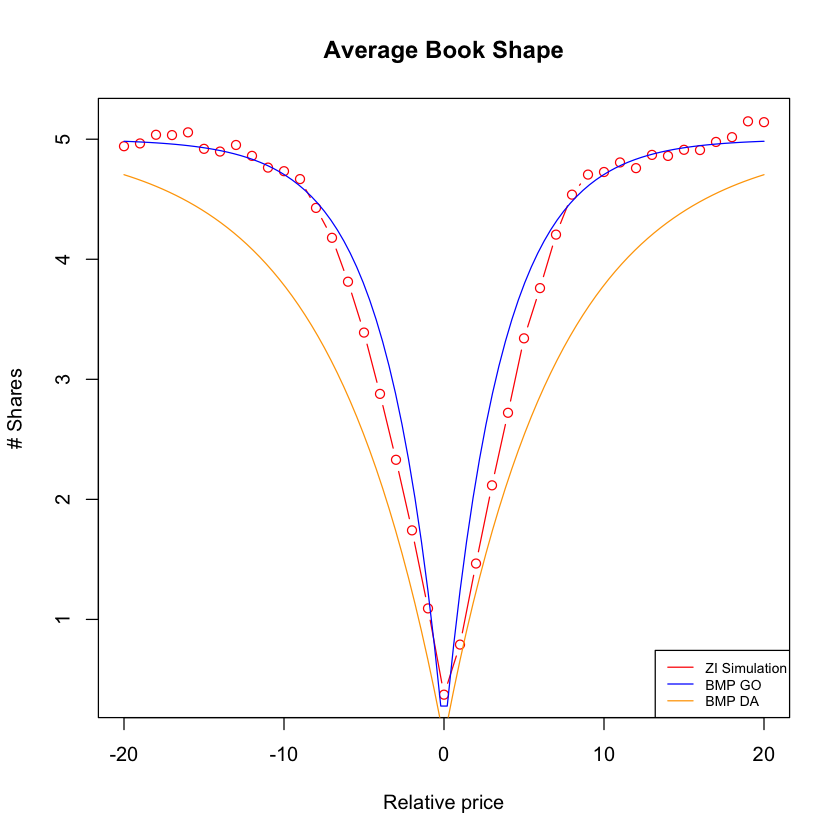

In [8]:
# Plot the result
plot(-20:20, avgBookShape, main="Average Book Shape", xlab="Relative price", ylab="# Shares", col="red", type="b")
curve(rho(alpha, delta, DeltaGO, x), from=-20, to=20, n=100, col="blue", add=T)
curve(rho(alpha, delta, DeltaDA, x), from=-20, to=20, n=100, col="orange", add=T)
legend('bottomright', legend=c('ZI Simulation', 'BMP GO','BMP DA'), lty=c(1, 1, 1), col=c('red', 'blue','orange'), cex=0.7)

<font color=red>COMMENT: the blue line is a little too high. -1pt</font>

### 5. (6 points)

Another of Mike and Farmer's observations is that the distribution of marketable as well as unmarketable limit orders as a function of distance $\Delta$ to the same-side best quote is well-described by a Student-$t$ distribution.  Assume $\mu=1/2$ as above.

(a) Derive an expression in terms of the Student-$t$ cumulative density function for the ratio of arrival rates of limit to market orders as a function of the spread $s$.  How does this ratio vary with $s$?

(b) Relative to the zero-intelligence model, does this empirically observed strategic behavior make the spread revert faster or more slowly?

### Solution

(a)

Let $F(\Delta)$ be the CDF of student-t distribution. The CDF of unmarketable limit orders, which is below the best offer, is $F(s)$. Then the CDF of marketable limit orders is $1-F(s)$, which is $F(-s)$.

Thus, the ratio of limit orders to market orders is
$$r_{L/M}=\frac{F(s)}{F(-s)}$$
whcih is an increasing function of the spread $s$.

Therefore, as the spread widens, the limit orders will take a relatively large proportion and *vice versa*.

(b)

This empirically observed strategic behavior introduces a negative feedback comparing to the zero-intelligence model. As the spread widens, the proportion of limit order increases and shrinks the spread, while as the spread tightens, the proportion of market order increases and expands the spread. As a result of the negative feedback, the spread would revert faster than it does in the zero-intelligence model.

### References

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel C. A Oomen, Zero-intelligence realized variance estimation, <span>*Finance and Stochastics*,</span> <span>**14**</span>(2) 249–283, 2010.</li>

</ol>